In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, glob, inspect, sys
import re

from sklearn.preprocessing import MinMaxScaler

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
import epri_mc_lib_2 as mc
from importlib import reload
reload(mc)

<module 'epri_mc_lib_2' from '/Users/peerapon/Dropbox/Public/WORKs/Python/S2DS/Oct20_EPRI/Task2/NB/epri_mc_lib_2.py'>

In [2]:
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df = mc.load_data("../../Data/Merged_data/CopulaGAN_simulated_data.csv")
# df =  pd.read_csv("../../Data/Merged_data/CopulaGAN_simulated_data.csv", index_col=0)
# df.drop(columns=["type_cw"], inplace=True)
df.head()

,KJIC,MS_Avg,MS_neg_error,MS_pos_error,TEP_average,TEP_error,PC_IF_2.25MHz,SE_IF_2.25MHz,SE_%_IF_2.25MHz,PC_IF_3.5MHz,SE_IF_3.5MHz,SE_%_IF_3.5MHz,PC_BS,Type,log_beta_avg
0,60.489458,0.000208,3.144186e-18,0.000000,0.387439,0.028421,4.289459e-01,0.644724,0.248409,0.174966,0.216762,0.081798,0.060829,A286,0.390684
1,44.261992,0.000694,1.394590e-12,0.000000,0.299858,0.021298,5.438486e-01,0.570093,0.164493,0.624207,0.256072,0.069445,0.046113,A286,0.211567
2,156.352240,0.000824,1.371576e-13,0.000000,0.555533,0.014093,1.141398e-15,0.177683,0.412605,0.088545,0.006998,0.077791,0.692367,A286,0.418086
3,70.025254,0.748869,5.664571e-01,0.512708,0.702281,0.236950,9.454126e-02,0.699935,0.316444,0.158487,0.292054,0.175773,0.615641,304,0.632568
4,102.089063,0.166288,2.180741e-01,0.318681,0.572501,0.086650,4.748123e-02,0.563716,0.281227,0.458641,0.140300,0.299004,0.330674,304,0.239343


r2 score for training:  0.9917483614349746
r2 score for testing:  0.9300465058220744


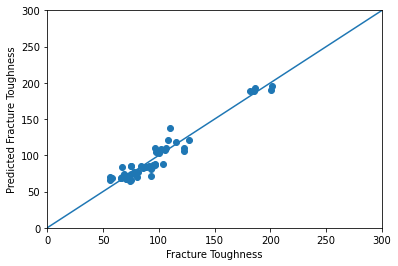

In [4]:
def rf_pipeline(mat_df):
    mat_df = mat_df.drop(columns=["Type"])
    
    X_train, X_test, y_train, y_test = train_test_split(mat_df.drop(columns=['KJIC']), 
                                                                mat_df['KJIC'], 
                                                                test_size=0.2, 
                                                                random_state=2020)
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    
    print("r2 score for training: ", r2_score(y_train, model.predict(X_train)))
    print("r2 score for testing: ", r2_score(y_test, y_pred))
    
    
    plt.scatter(y_test, y_pred)
    plt.plot([0, 1000], [0, 1000])
    plt.xlim([0, 300])
    plt.ylim([0, 300])
    plt.xlabel("Fracture Toughness")
    plt.ylabel("Predicted Fracture Toughness")
    
    return 
ss304 = df[df['Type']=='304']
ss316 = df[df['Type']=='316']
ss347 = df[df['Type']=='347']
rf_pipeline(ss347)